In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
keywords = pd.read_csv('../data/keyword_tweet_count.csv')

In [8]:
keywords

,name,key_word_tweet_count,tweet_count,key_word_ratio,likes,follower_count,like_follower_ratio
0,Finance.Vote,146,180,0.811111,1249,7025,0.177794
1,Compound,104,132,0.787879,7354,218838,0.033605
2,OceanDAO,25,33,0.757576,448,1988,0.225352
3,XDAO,97,159,0.610063,1329,6174,0.215258
4,Collab19,15,25,0.600000,44,52,0.846154
...,...,...,...,...,...,...,...
106,Shark DAO,12,159,0.075472,103,6743,0.015275
107,1inch,10,136,0.073529,1214,1015150,0.001196
108,Kleros,11,161,0.068323,138,22464,0.006143
109,CENNZnet Grants DAO,11,164,0.067073,271,7870,0.034435


/Users/sonnguyen/opt/anaconda3/envs/dsi-111/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Keyword Ratio Distribution')

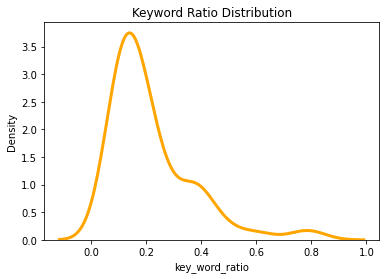

In [29]:
sns.distplot(
    keywords['key_word_ratio'], hist=False, kde=True,
    bins = int(75/5), color = 'orange',
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 3})
plt.title('Keyword Ratio Distribution')

/Users/sonnguyen/opt/anaconda3/envs/dsi-111/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Tweet Like/Follower Ratio Distribution')

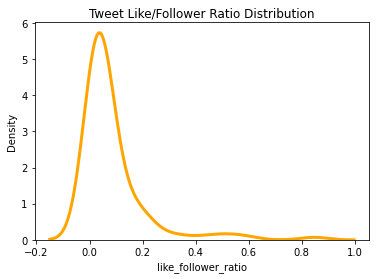

In [32]:
sns.distplot(
    keywords['like_follower_ratio'], hist=False, kde=True,
    bins = int(75/5), color = 'orange',
    hist_kws={'edgecolor':'black'},
    kde_kws={'linewidth': 3})
plt.title('Tweet Like/Follower Ratio Distribution')